# Atmospheric processes: from cloud to global scales
# Exercise on radar, microphysics and mountain meteorology

## Introduction 

In this exercise, you will analyze data from the PLATO campaign that took place at the Davis research station in Antarctica, in January 2019.
The case study corresponds to a precipitation event on January 8, 2019, where interesting signatures were observed.

**1st part**\
We will look at data from two radars:
- BASTA is a vertically-pointing W-band (94 GHz) radar, measuring time series of radar reflectivity and mean Doppler velocity
- MXPol is a scanning X-band (9.4 GHz) radar. From its measurements, we extract vertical profiles of radar reflectivity. **( TO DO - DO WE WANT TO ADD SOMETHING ABOUT SPECTRA ??)**

We also examine radiosonde data, from a sounding launched at Davis station at 12UTC on January 8.

**2nd part**\
To complement the observations, simulations from a high-resolution weather model are used to study atmospheric dynamics with a 3D perspective. This allows to investigate the interactions between the large-scale synoptic situation, the terrain, and the microphysical processes.


### Preparing Python for the exercise

You will need to install some Python libraries for executing the code in this exercise.
A notebook has been created for the installation, and it is available at:

https://noto.epfl.ch/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fltelab%2FAtmProc2024&urlpath=lab%2Ftree%2FAtmProc2024%2Finstall_python_environment.ipynb%3Fautodecode&branch=main&depth=1

Access it and execute the code in it. When you finish the installation, come back to this notebook for completing the exercise.

### Activating the kernel

In the installation notebook, we creatred a virtual environment in which we installed some python libraries. A kernel has been associated to this environment.
You will need to activate this kernel for the current exercise for loading the libraries correctly.

Click on the "Switch kernel" button in the right hand corner of the screen. It is the small text on the left of the circle ("kernel status" indicator) and on the right of the bug icon ("Debugger" icon).
Once you click on it, a drop-down menu will appear and you will be able to select the kernel we created, called "AtmProc_Ex2".
Select "AtmProc_Ex2" in the list and click on the "Select" button.

If the "AtmProc_Ex2" kernel does not appear in the drop-down menu, interrupt the current kernel (square button in the bar at the top of this tab) and restart it (circular arrow, on the right of the square button).
Then, repeat the procedure to select the "AtmProc_Ex2" kernel, and it should appear in the list.

### General instructions
This exercise does not require to code in Python. You will simply have to execute the cells one after the other by pressing Shift + Enter. In some cells, you will have to adjust the values of certain variables, which will be specified clearly (in CAPITAL letters).

The questions will guide you through an interpretation of the radar variables in terms of cloud or precipitation microphysical properties and processes.
More difficult questions are indicated with a star (*).


## Part I

In [11]:
from netCDF4 import Dataset
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
import matplotlib.dates as mdates
import datetime
datefmt = mdates.DateFormatter('%H:%M')
import pandas as pd
plt.rcParams['font.size']=14

In [12]:
# In this cell, we load the radar data
nc_basta = Dataset('Data/BASTA_L2_merged_20190108.nc')
t_basta = nc_basta.variables['time']
dt = [datetime.datetime(2019,1,8)+datetime.timedelta(seconds=int(tt)) for tt in nc_basta.variables['time'][:]]
rg = nc_basta.variables['height'][:]
Ze = nc_basta.variables['reflectivity'][:]
VDop = nc_basta.variables['velocity'][:]
mask = Ze<-50
VDop[mask]=np.nan
Ze[mask]=np.nan

nc_dfr = Dataset('Data/PLATO_dual_frequency_radar_data_20190108.nc')
t_dfr = nc_dfr.variables['time'][:]+3600
dt_dfr = [datetime.datetime.fromtimestamp(tt, tz=datetime.timezone.utc) for tt in t_dfr]
rg_dfr = nc_dfr.variables['range'][:]
DFR = nc_dfr.variables['ZeX'][:]-nc_dfr.variables['ZeW'][:]

In the following cell, we plot the timeseries of radar variables measured by BASTA (radar reflectivity Ze and mean Doppler velocity)

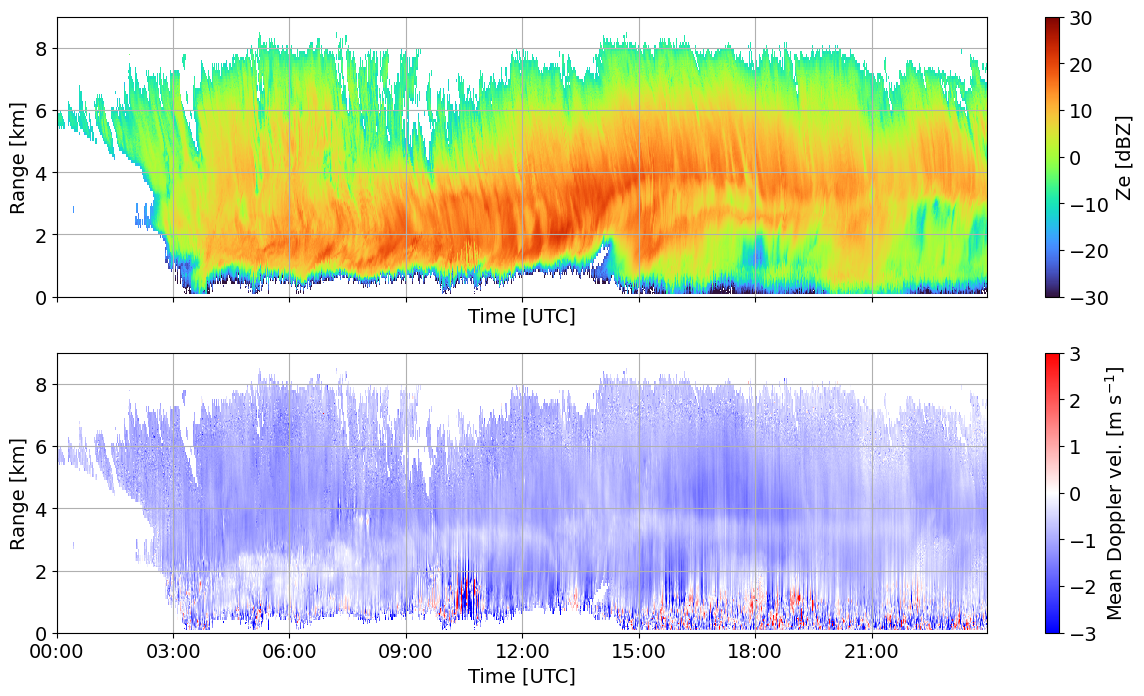

In [13]:
plt.rcParams['font.size']=14
fig,axs = plt.subplots(2,figsize=(15,8),sharex=True)
im0=axs[0].pcolormesh(dt,rg/1e3,Ze,vmin=-30,vmax=30,cmap='turbo')
im1=axs[1].pcolormesh(dt,rg/1e3,VDop,vmin=-3,vmax=3,cmap='bwr')

for ax in axs:
    ax.set_ylim(0,9)
    ax.set_ylabel('Range [km]')
    ax.set_xlabel('Time [UTC]')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.grid()
plt.colorbar(im0,ax=axs[0],label='Ze [dBZ]')
_=plt.colorbar(im1,ax=axs[1],label='Mean Doppler vel. [m s$^{-1}$]')


> **Question 1**: Recall the physical meaning of radar reflectivity (Ze) and mean Doppler velocity (MDV). What are the radar targets here? What information do Ze and MDV respectively convey?

> **Question 2**: When is precipitation observed at the ground? Given the geographical location and the radar data, what type(s) of precipitation is (are) observed?

> **Question 3**: What type(s) of cloud is (are) present in these timeseries?

> **Question 4**: What do you observe in the radar timeseries at low levels (below ~1km, especially before 15UTC)? What microphysical process(es) is happening?

In [4]:
# In this cell, we load the radiosounding data
headers = ['Altitude A.G.L (m)', 'Pressure (Pa)', 'Temperature (K)', 'Specific humidity (kg/kg)', 'RH w.r.t liq (%)', 'RH w.r.t ice (%)', 'Wind speed (m/s)', 'Wind direction (deg)']
RS = pd.read_csv('Data/Davis_RS_20190108_12.txt',sep='\t',names = headers )
wind_dir = RS['Wind direction (deg)']
wind_dir[wind_dir>300]=wind_dir-360

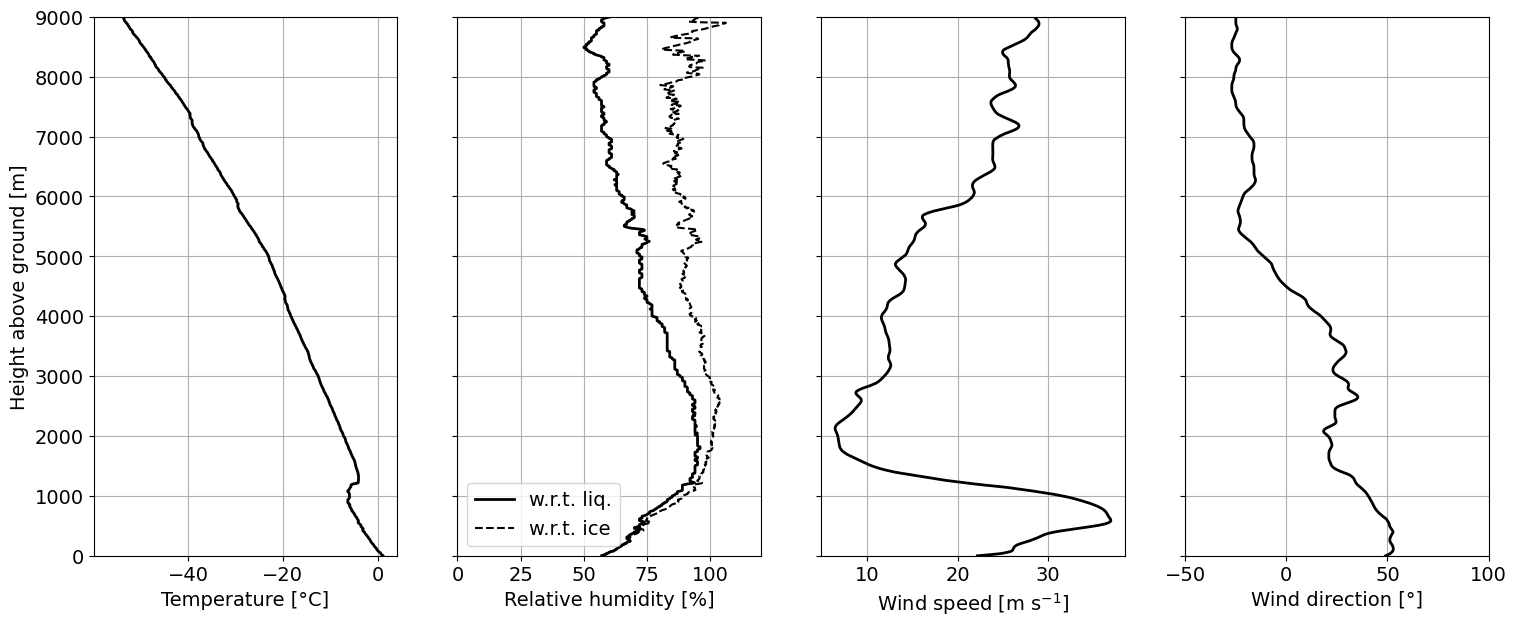

In [5]:
fig,axs=plt.subplots(1,4,figsize=(18,7),sharey=True)
axs[0].plot(RS['Temperature (K)']-273.15, RS['Altitude A.G.L (m)'],'k',lw=2)
axs[1].plot(RS['RH w.r.t liq (%)'], RS['Altitude A.G.L (m)'],'k',lw=2, label='w.r.t. liq.')
axs[1].plot(RS['RH w.r.t ice (%)'], RS['Altitude A.G.L (m)'],'--k',lw=1.5, label='w.r.t. ice')
axs[2].plot(RS['Wind speed (m/s)'], RS['Altitude A.G.L (m)'],'-k',lw=2)
axs[3].plot(RS['Wind direction (deg)'], RS['Altitude A.G.L (m)'],'-k',lw=2)
axs[0].set_ylim(0,9000)
axs[1].set_xlim(0,120)
axs[3].set_xlim(-50,100)
axs[0].set_ylabel('Height above ground [m]')
axs[0].set_xlabel('Temperature [°C]')
axs[1].set_xlabel('Relative humidity [%]')
axs[1].legend()
axs[2].set_xlabel('Wind speed [m s$^{-1}$]')
axs[3].set_xlabel('Wind direction [°]')
for ax in axs:
    ax.grid()

We plot the standard variables measured by the radiosonde launched at Davis station on January 8 at 12UTC. 

> **Question 5** How do these sounding data confirm (or not) your answer to question 4?


We now plot the dual-frequency ratio between X and W-band reflectivity, which is defined as $DFR = Ze_X$ - Ze_W$ with $Ze_X$ and $Ze_W$ in logarithmic units (dBZ).


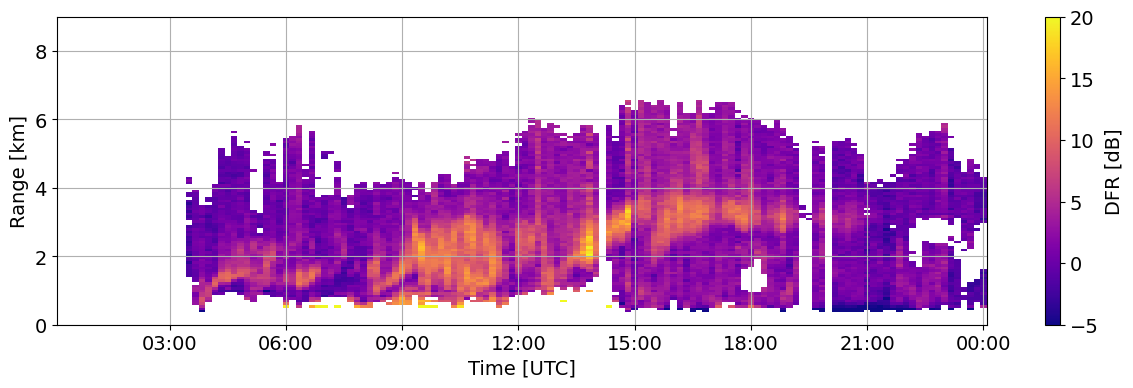

In [6]:
plt.rcParams['font.size']=14
fig,ax = plt.subplots(figsize=(15,4))
im0=ax.pcolormesh(dt_dfr,rg_dfr/1e3,DFR.T,vmin=-5,vmax=20,cmap='plasma')
ax.set_ylim(0,9)
ax.set_ylabel('Range [km]')
ax.set_xlabel('Time [UTC]')
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
_=plt.colorbar(im0,label='DFR [dB]')


>**Question 6** Recall how DFR can be interpreted in terms of precipitation microphysics. What possible processes could explain the regions of higher DFR in this timeseries?


## Part II

We propose the hypothesis that interaction between the large-scale atmospheric flow and the local orographic terrain is responsible for the observed phenomena:
- the low-level process discussed in questions 4-5, 
- and the higher-level process observed in question 6. 

The next steps of the exercise investigate this hypothesis, by relying on the outputs of a high-resolution numerical model (Weather Research Forecast, WRF) which was run on this event.

**Upload the data**: The data could not be shared through Noto, so you have to upload it yourself. Download it from the following link: https://enacshare.epfl.ch/for5XVEUYejSiALZ7xt3vzaJ4cTRwQd
Then upload it to the AtmProc2024/Exercise_2/Data/ directory on your Noto space (drag and drop).

In [8]:
%reset -f

# Import required libraries
import wrf
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import datetime
import matplotlib.colors as colors

# Load and prepare data
nc = Dataset('Data/wrfout_Davis1_v2lessdiff_d03_subselection.nc')
lat_Davis, lon_Davis = -68.576667, 77.9675
pivot_point = wrf.CoordPair(lat=lat_Davis, lon=lon_Davis)

it = 0
pressure = wrf.getvar(nc, "pressure",timeidx=it)
wa = wrf.getvar(nc,"wa",units="m s-1",timeidx=it)
ua = wrf.getvar(nc,"ua",units="kt",timeidx=it)
va = wrf.getvar(nc,"va",units="kt",timeidx=it)
h = wrf.getvar(nc,"height_agl",timeidx=it)+wrf.getvar(nc,"ter",timeidx=it)
ter = wrf.getvar(nc,"ter",timeidx=it)
th = wrf.getvar(nc,"th",units="K",timeidx=it)
rh_lw = wrf.getvar(nc,"rh",timeidx=it)
temp = wrf.getvar(nc,"temp",units="K",timeidx=it)
pcum = wrf.getvar(nc, "RAINNC",timeidx=-1)
dt_wrf = [datetime.datetime(2019,1,7,0,tzinfo=datetime.timezone.utc)+datetime.timedelta(minutes=int(m)) for m in nc['XTIME'][:]]

# A few calculations to derive relative humidity w.r.t ice 
A_w = 2.53 * (10**8) #kPa
B_w = 5.42 * (10**3) # K
es_w = A_w * np.exp(-((B_w)/temp))
A_i = 3.41 * (10**9) #kPa
B_i = 6.13 * (10**3) #K
es_i=A_i* np.exp(-((B_i)/temp))
rh_i=rh_lw*(es_w/es_i)

In the next cell, you will plot a map of certain meteorological fields in the area of the research station, as modeled with WRF.
At the beginning of the cell, you can define whether or not to plot certain fields, and at which altitude: you can choose to plot them at ground level or at a given altitude (i.e., horizontal cross-section.)

>**Question 7** Look at the map with no meteorological fields plotted (only terrain contours). Briefly describe the topography.

>**Question 8** Plot the horizontal wind field (wind barbs) at a chosen altitude (surface level or horizontal cross-section - you can try several). Discuss its orientation with respect to the topography, in the vicinity of the station. Give examples of what could result from this interaction.

>**Question 9** Plot the vertical wind field at a chosen altitude (surface level or horizontal cross-section - you can try several). Discuss, and propose explanations (taking into account the previous questions).


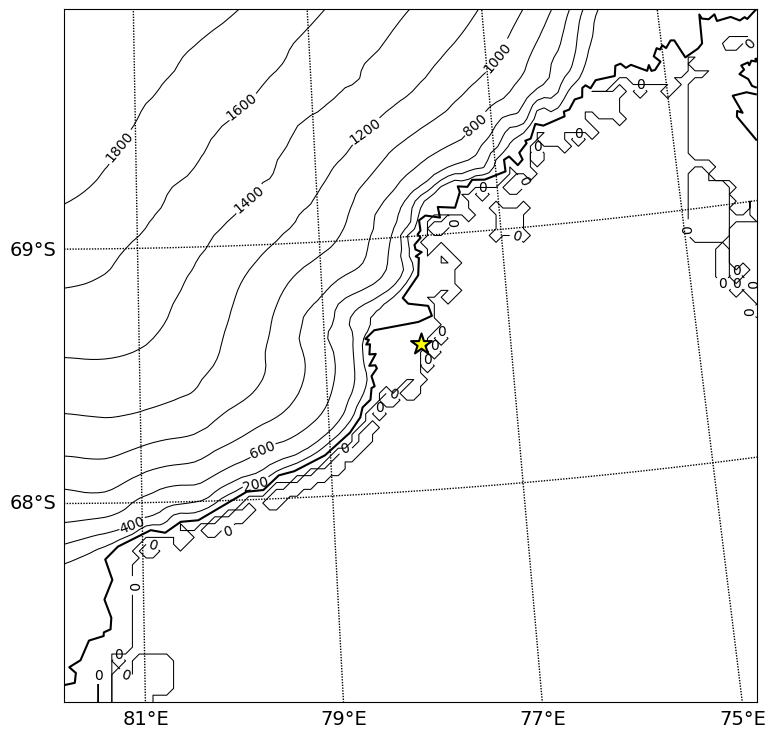

In [9]:
# 1 - Define whether to display horizontal wind field and how
# Wind barbs are a concise way of representing the horizontal wind field with speed and direction. They follow a specific convention (detailed here for instance: https://www.weather.gov/hfo/windbarbinfo)
WIND_BARBS = False # Set to True to plot the wind barbs
WIND_BARBS_ALTITUDE = -1 # Set to -1 if you want to plot the wind field at the surface; set to an altitude value > 0 to plot the wind field at this altitude.

# 2 - Define whether to display vertical wind field and how
W_WIND_CONTOURS = False # Set to True to plot the vertical wind field
W_WIND_ALTITUDE = -1 # Set to -1 if you want to plot the wind field at the surface; set to an altitude value > 0 to plot the wind field at this altitude.

# 3 - In the next cell we propose to plot a **vertical** cross-section of meteorological fields. Here you can define the direction of the cross-section (passing through Davis research station) by setting the ANGLE value.
PLOT_CROSS_SECT_LINE = False
ANGLE = 0


# Get the lat/lon coordinates
lats, lons = wrf.latlon_coords(h)
# Get the basemap object
bm = wrf.get_basemap(ter,resolution='i')
x, y = bm(wrf.to_np(lons), wrf.to_np(lats)) # Convert the lat/lon coordinates to x/y coordinates in the projection space

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes()

# Add the terrain contours
levels = np.arange(0,2000,200)
contours = bm.contour(x, y, wrf.to_np(ter), levels=levels, colors="black",linewidths=.75)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the geographic boundaries
bm.drawcoastlines(linewidth=1.5)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)
bm.drawparallels(np.arange(-70., -67., 1.), labels=[1,0,0,0])
bm.drawmeridians(np.arange(75.,82.,2.), labels=[0,0,0,1])

# Add Davis station location 
xd,yd = bm(lon_Davis,lat_Davis)
bm.scatter(xd,yd,marker='*',color='yellow',edgecolor='k',s=250,zorder=100,linewidth=1.5)


# Add the wind barbs
if WIND_BARBS:

    if WIND_BARBS_ALTITUDE > 0:
        u_barbs = wrf.interplevel(ua, h, WIND_BARBS_ALTITUDE)
        v_barbs = wrf.interplevel(va, h, WIND_BARBS_ALTITUDE)
    else: # wind field at the surface
        u_barbs = ua[0]
        v_barbs = va[0]

    bm.barbs(x[::10,::10], y[::10,::10], wrf.to_np(u_barbs[::10, ::10]), wrf.to_np(v_barbs[::10, ::10]), length=6, zorder=10)


# Add the wind speed contours
if W_WIND_CONTOURS:
    if W_WIND_ALTITUDE > 0:
        w_field = wrf.interplevel(wa, h, W_WIND_ALTITUDE)
    else:
        w_field = wa[0]

    w_levels = np.linspace(-1.5,1.5,100,endpoint=True)
    wspd_contours = bm.contourf(x, y, wrf.to_np(w_field), w_levels, cmap="seismic",extend="both")
    cbar_ticks = np.linspace(-1.5,1.5,7, endpoint=True)
    cbar = plt.colorbar(wspd_contours, ax=ax, fraction=0.046, pad=0.04, label = 'vertical wind [m s$^{-1}$]')
    cbar.set_ticks(cbar_ticks)

# Add the direction of the vertical cross-section
if PLOT_CROSS_SECT_LINE:
    ter_line = wrf.interpline(ter, wrfin=nc, pivot_point=pivot_point, angle=ANGLE,latlon = True, meta=True)
    coord_pairs = wrf.to_np(ter_line.coords["xy_loc"])
    latline = [cc.lat for cc in coord_pairs]
    lonline = [cc.lon for cc in coord_pairs]
    xline,yline = bm(lonline,latline)
    bm.plot(xline,yline,'-',color='fuchsia',lw=2)


We will now investigate this further to see how these observations relate to the observed radar signatures and microphysical processes.
For this, we perform a vertical cross section through the domain, passing at the research station.\
In the **previous** cell, choose a good angle for the cross-section direction and visualize it.

In the next cell, you can activate certain variables to plot in this cross-section (set their value to ``True``).

>**Question 10** Plot the wind field cross-section (wind barbs and vertical wind) and describe the pattern that you see. How does the topography influence the wind field? (relate to the previous questions)

We now examine other meteorological variables. \
In the next cell, the *bottom* plot displays the cumulated precipitation (at ground level) along the cross-section line, during the entire event.


>**Question 11** How is the precipitation pattern correlated with the topography?


>**Question 12** Include the relative humidity contours in the cross-section plots. Describe and discuss; how is this consistent with the wind field, the precipitation pattern, and with the results from the first part of the exercise (radar + radiosounding, questions 4 and 5)?  What phenomenon could this correspond to? 


>**Question 12bis** Include the potential temperature contours in the cross-section plots. Describe and discuss; what does it reveal about the cause of the phenomenon?

Note: feel free to remove the previously drawn contours if the figures becomes too difficult to read (set the corresponding variables to ``False``).

>**Question 13** Include the "TURB_DISS" field (dissipation rate of turbulent kinetic energy), which reveals regions with atmospheric turbulence. Describe this cross-section and how it correlates with the vertical wind cross-section and the terrain profile.  

>**Question 13bis (\*)** Looking back at the dual-frequency radar measurements investigated earlier (Question 6), propose an explanation for how the atmospheric dynamics may contribute to the microphysics within the cloud.


Text(0, 0.5, '[mm]')

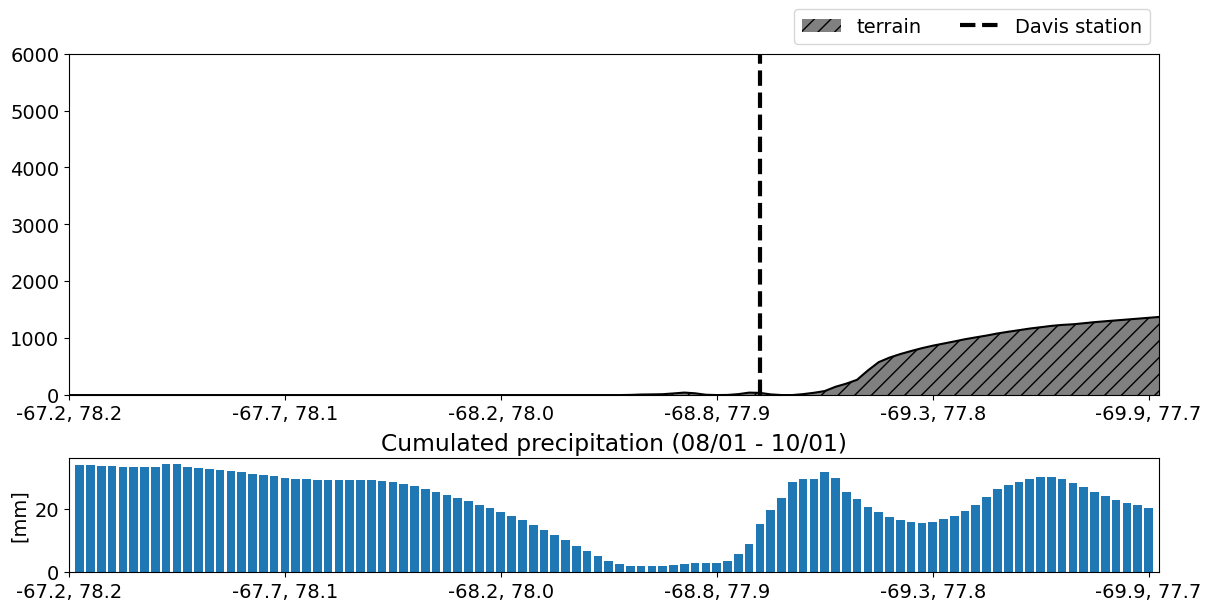

In [10]:
WIND_BARBS = False
W_WIND = False # Vertical wind
POTENTIAL_TEMPERATURE = False
RH_I = False # Relative humidity with respect to ice
TURB_DISS = False

###########################################################

wspd_cross = wrf.vertcross(wa, h, wrfin=nc, pivot_point=pivot_point, angle = ANGLE, latlon=True, meta=True)
v_cross = wrf.vertcross(va, h, wrfin=nc, pivot_point=pivot_point, angle=ANGLE, latlon=True, meta=True)
u_cross = wrf.vertcross(ua, h, wrfin=nc, pivot_point=pivot_point, angle=ANGLE, latlon=True, meta=True)
th_cross = wrf.vertcross(th, h, wrfin=nc, pivot_point=pivot_point, angle=ANGLE, latlon=True, meta=True)
rhi_cross = wrf.vertcross(rh_i, h, wrfin=nc, pivot_point=pivot_point, angle=ANGLE, latlon=True, meta=True)
ter_line = wrf.interpline(ter, wrfin=nc, pivot_point=pivot_point, angle=ANGLE,latlon = True, meta=True)
pcum_line = wrf.interpline(pcum, wrfin=nc, pivot_point=pivot_point, angle=ANGLE,latlon=True, meta=True)
cldfra = wrf.getvar(nc,'CLDFRA',timeidx=0)
cldfra_cross = wrf.vertcross(cldfra, h, wrfin=nc, pivot_point=pivot_point, angle = ANGLE, latlon=True, meta=True)
qdiss = wrf.getvar(nc, 'QDISS')[:-1]
qdiss_cross = wrf.vertcross(qdiss, h, wrfin=nc, pivot_point=pivot_point, angle = ANGLE, latlon=True, meta=True)

xs = np.arange(0, wspd_cross.shape[-1], 1)
ys = wrf.to_np(wspd_cross.coords["vertical"])
coord_pairs = wrf.to_np(ter_line.coords["xy_loc"])

# Create the figure
fig,(ax,ax1) = plt.subplots(2,figsize=(12,6),gridspec_kw={'height_ratios':[3,1]},sharex=False,constrained_layout=True)
ncol=2

# Plot the terrain profile
ht_fill = ax.fill_between(xs, 0, wrf.to_np(ter_line), facecolor="gray",hatch='//', label='terrain')
ax.plot(xs,ter_line,'k')
ax.plot()
ax.vlines(64,0,6000,'k',linestyle='--',lw=3, label='Davis station')

# Define the x-axis
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = ['%.1f, %.1f'%(pair.lat,pair.lon) for pair in coord_pairs]
num_ticks = 5
thin = int((len(x_ticks) / num_ticks) + .5)
ax.set_xticks(x_ticks[::thin])
ax.set_xticklabels(x_labels[::thin])
ax1.set_xticks(x_ticks[::thin])
ax1.set_xticklabels(x_labels[::thin])
ax.set_xlim(x_ticks[0], x_ticks[-1])
ax1.set_xlim(x_ticks[0], x_ticks[-1])

# Add the wind barbs
if WIND_BARBS:
    x_barb=10
    y_barb=5
    ax.barbs(xs[::x_barb],ys[::y_barb],u_cross[::y_barb,::x_barb],v_cross[::y_barb,::x_barb],zorder=10,length=6,linewidth=.75)

# Make the filled contour plot of vertical wind
if W_WIND:
    wspd_contours = ax.contourf(xs,ys,wrf.to_np(wspd_cross), cmap="seismic",levels=np.linspace(-1.5,1.5,50,endpoint=True),extend='both')
    cbar_ticks = np.linspace(-1.5,1.5,7, endpoint=True)
    cbar = plt.colorbar(wspd_contours, ax=ax, fraction=0.046, pad=0.04, label = 'vertical wind [m s$^{-1}$]')
    cbar.set_ticks(cbar_ticks)


# Contour plot of potential temperature
if POTENTIAL_TEMPERATURE:
    th_contours = ax.contour(xs,ys,wrf.to_np(th_cross), colors='k',levels=np.arange(200,350,2))
    plt.clabel(th_contours, th_contours.levels[::2], inline=1, fontsize=10, fmt="%iK")
    ax.plot([-1,-1],[-1,-1], label='Pot. temp.',color='k')
    ncol+=1

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

if RH_I:
    rhi_contours = ax.contour(xs,ys,wrf.to_np(rhi_cross), colors='g',levels=np.arange(30,120,5))
    plt.clabel(rhi_contours, rhi_contours.levels[::2], inline=1, fontsize=10, fmt=fmt)
    ax.plot([-1,-1],[-1,-1], label='RH w.r.t.  ice',color='g')
    ncol+=1


if TURB_DISS:
    qdiss_contours = ax.contour(xs,ys,wrf.to_np(qdiss_cross), colors='magenta',levels=np.logspace(-5,2,14,endpoint=True),extend='both',norm=colors.LogNorm())
    plt.clabel(qdiss_contours, qdiss_contours.levels[::2], inline=1, fontsize=10, fmt="%.0E")
    ax.plot([-1,-1],[-1,-1], label='turb. diss.',color='magenta')
    ncol+=1

ax.legend(bbox_to_anchor=(1,1), loc='lower right',ncol=ncol)

ax.set_ylim(0,6000)
ax1.bar(xs,pcum_line)
ax1.set_title('Cumulated precipitation (08/01 - 10/01)')
ax1.set_ylabel('[mm]')

In [ ]:
### Below are a few tests - can be useful if we want to do some Froude number calculations (TO DO remove or add question)

In [ ]:
th_davis = th[:,51,51]
h_davis = h[:,51,51]
dth_dz = (th_davis[1:]-th_davis[:-1])/(h_davis[1:]-h_davis[:-1])
g = 9.81
NBV = np.sqrt(g/(.5*(th_davis[1:]+th_davis[:-1])) * dth_dz)

In [ ]:
plt.plot(ter_line)
plt.vlines(38,0,400)
plt.vlines(74,0,400)

In [ ]:
# plt.plot(dth_dz,h_davis[1:])
plt.plot(th_davis,h_davis[:])
plt.ylim(0,2000)
# plt.xlim(0,0.01)
plt.xlim(270,300)

In [ ]:
wspd_davis = np.sqrt(ua[:,51,51]**2+va[:,51,51]**2)

In [ ]:
plt.plot(wspd_davis,h_davis)

In [ ]:
Froude = .5*(wspd_davis[1:]+wspd_davis[:-1])/(NBV*500)

In [ ]:
plt.plot(Froude, h_davis[1:])

In [ ]:
N0 = 0.01
DTHDZ = 0.002
TH = 280
N = np.sqrt(g/TH*DTHDZ)
U = 50
H = 500
L = 65000/2

FL = U/(N*L)
FH = U/(N*H)

print('FL = ', FL, 'FH =', FH)

In [ ]:
N